In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
df = pd.read_csv('/content/drive/MyDrive/Assignment - Junior Data Analyst.csv')

In [183]:
df.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


In [185]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# print(df.battery.value_counts())
df['brand']=df['name'].str.split(' ').str[0]
df['battery_capacity'] = df['battery'].str.split(' ').str[0].astype(int)
df['RAM']=df['memory'].str.replace('512 MB RAM', '0.5 GB RAM')
df['RAM']=df['RAM'].str.replace('32 MB RAM', '0.032 GB RAM')
df['RAM']=df['RAM'].str.replace('256 MB RAM', '0.25 GB RAM')
df['RAM']=df['RAM'].str.split(' GB RAM').str[0].astype(float)
df['ROM']=df['memory'].str.replace('512 MB', '0.5 GB')
df['ROM']=df['ROM'].str.replace('32 MB', '0.032 GB')
df['ROM']=df['ROM'].str.split(' ').str[4].str.strip().astype(float)
df['Display_Size']=df['display'].str.split(' ').str[0].astype(float)
df['Display_Type']=df['display'].str.split(')').str[1].str.split("Display").str[0].replace(' ', 'NaN')
df['Primary_Camera']=df['camera'].str.split(' ').str[0].str.replace('MP', '').astype(float)
df['Front_Camera']=df['camera'].str.split('|').str[1].str.split('MP').str[0].astype(float)
df['Reviews'] = df['reviews'].str.split(' ').str[0].str.replace(',', '').astype(float)
df=df.dropna()

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 983
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery           809 non-null    object 
 1   camera            809 non-null    object 
 2   display           809 non-null    object 
 3   memory            809 non-null    object 
 4   name              809 non-null    object 
 5   price             809 non-null    int64  
 6   processor         809 non-null    object 
 7   rating            809 non-null    float64
 8   reviews           809 non-null    object 
 9   warranty          809 non-null    object 
 10  brand             809 non-null    object 
 11  battery_capacity  809 non-null    int64  
 12  RAM               809 non-null    float64
 13  ROM               809 non-null    float64
 14  Display_Size      809 non-null    float64
 15  Display_Type      809 non-null    object 
 16  Primary_Camera    809 non-null    float64
 17  Fr

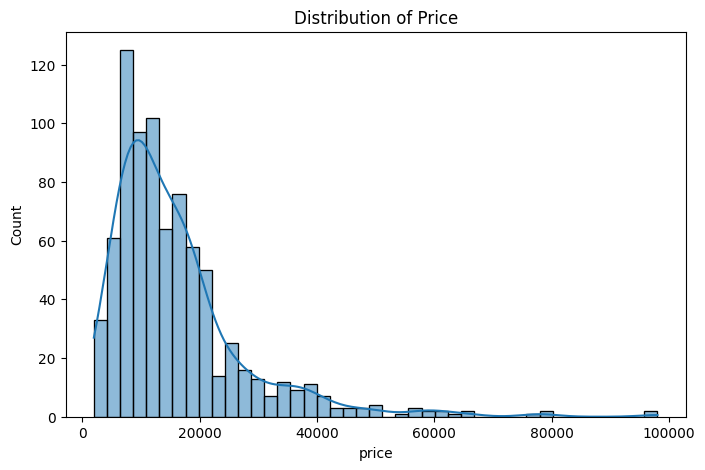

In [188]:
# Histogram for price
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

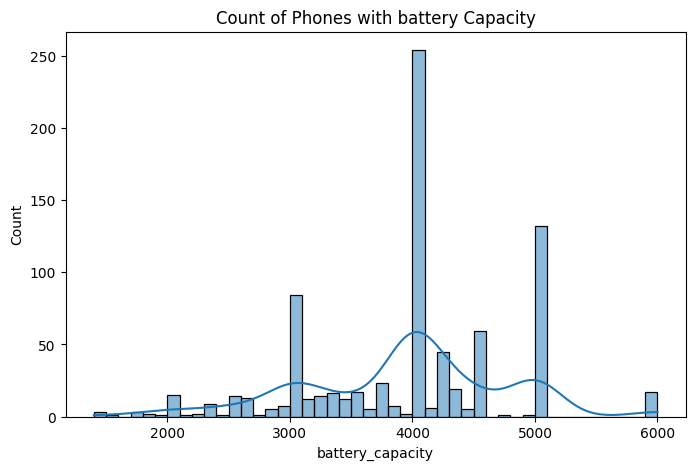

In [189]:
# Count plot for processor types
plt.figure(figsize=(8, 5))
sns.histplot(x=df['battery_capacity'], kde=True, binwidth=100)
plt.title('Count of Phones with battery Capacity')
plt.show()

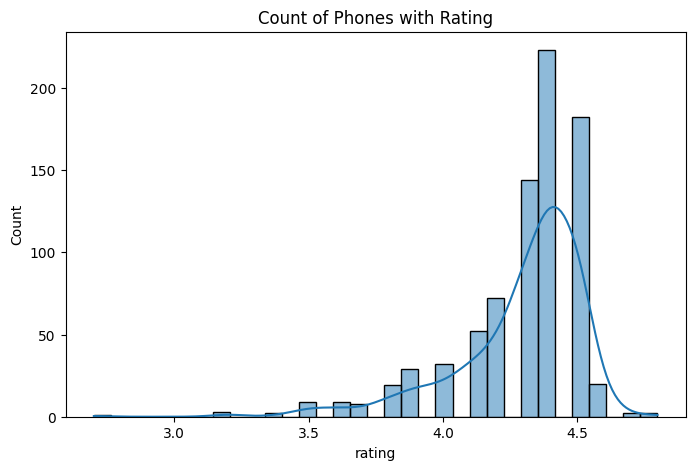

In [190]:
plt.figure(figsize=(8, 5))
sns.histplot(x=df['rating'], kde=True)
plt.title('Count of Phones with Rating')
plt.show()

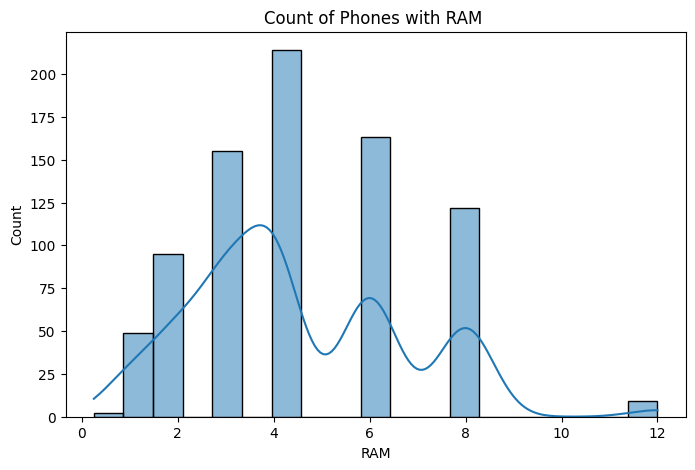

In [191]:
# Count plot for processor types
plt.figure(figsize=(8, 5))
sns.histplot(x=df['RAM'], kde=True)
plt.title('Count of Phones with RAM ')
plt.show()

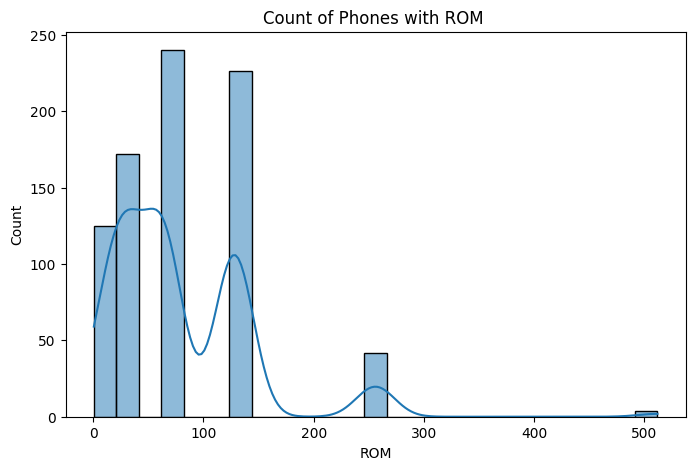

In [192]:
# Count plot for processor types
plt.figure(figsize=(8, 5))
sns.histplot(x=df['ROM'], kde=True)
plt.title('Count of Phones with ROM ')
plt.show()

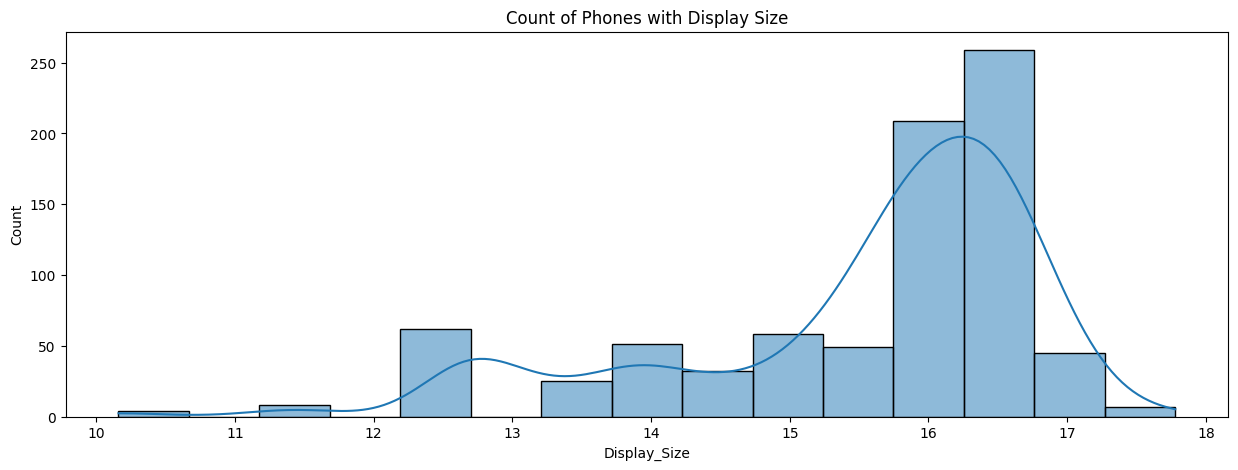

In [193]:
# Count plot for processor types
plt.figure(figsize=(15, 5))
sns.histplot(x=df['Display_Size'], kde=True, binwidth=0.5)
plt.title('Count of Phones with Display Size')
plt.show()

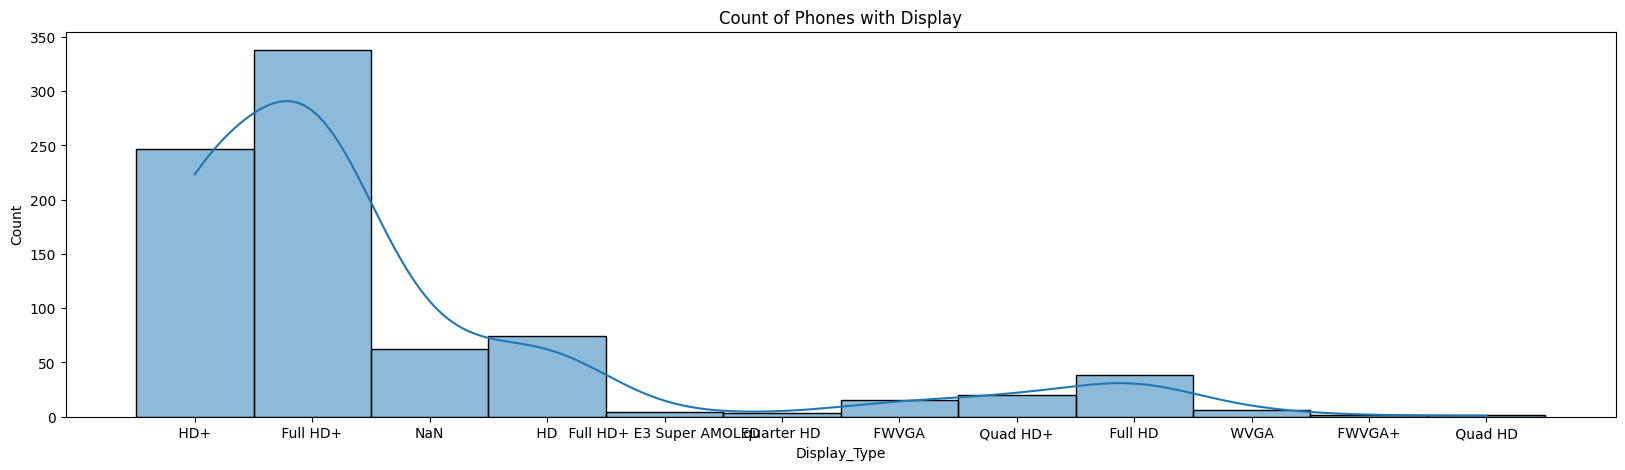

In [194]:
# Count plot for processor types
plt.figure(figsize=(20, 5))
sns.histplot(x=df['Display_Type'], kde=True)
plt.title('Count of Phones with Display')
plt.show()

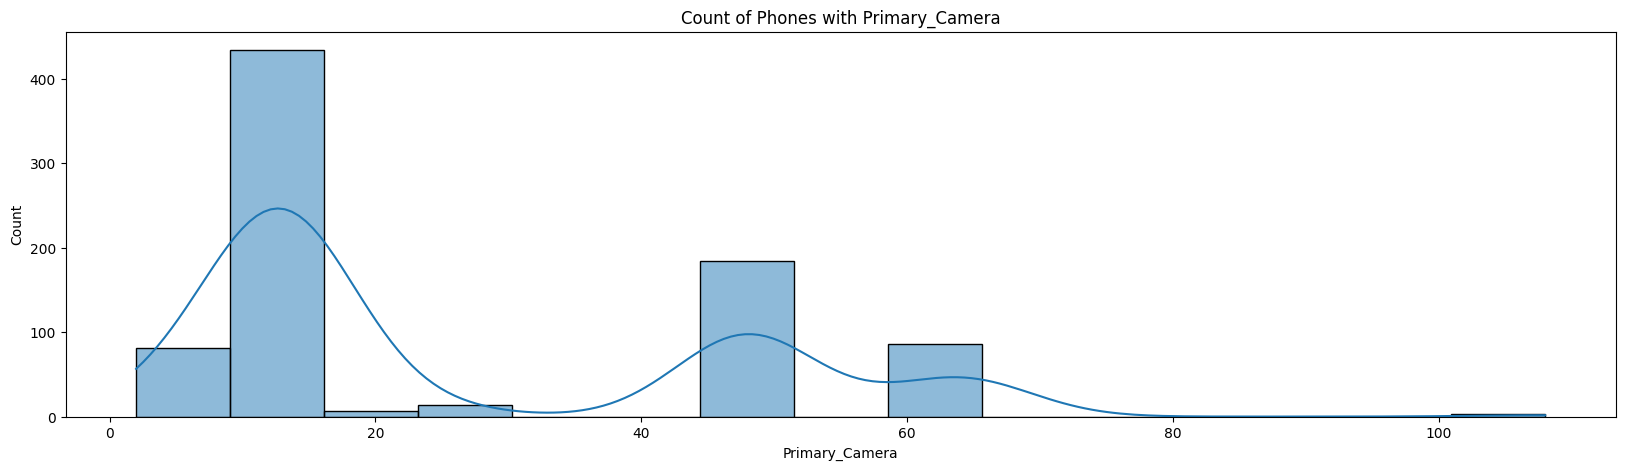

In [195]:
plt.figure(figsize=(20, 5))
sns.histplot(x=df['Primary_Camera'], kde=True)
plt.title('Count of Phones with Primary_Camera')
plt.show()

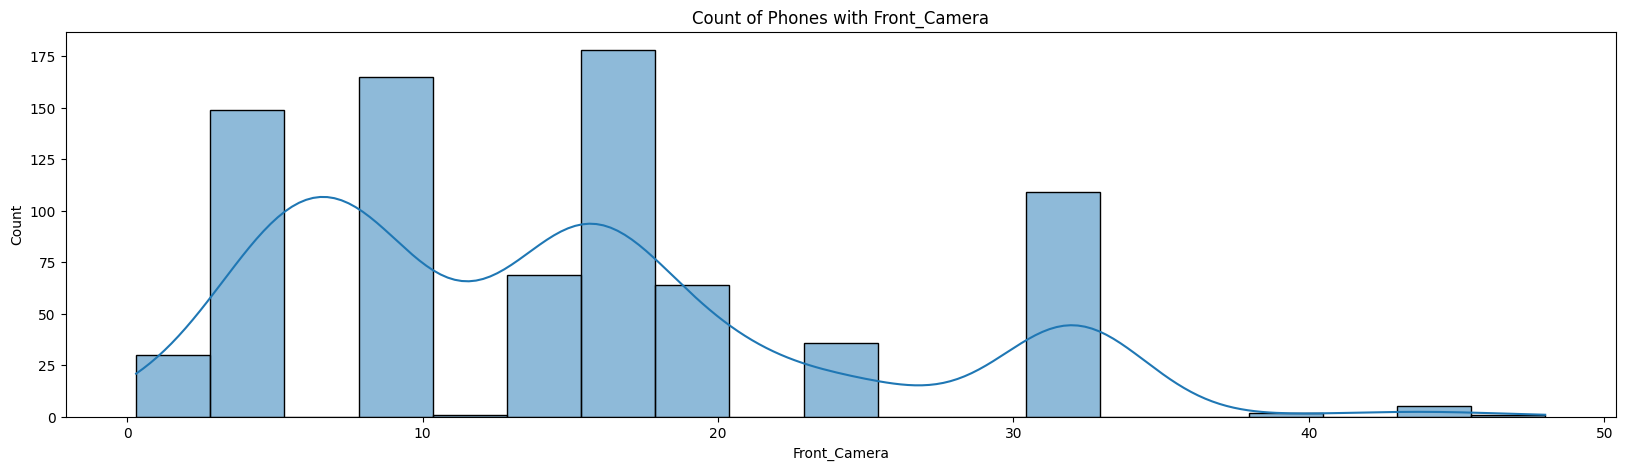

In [196]:
plt.figure(figsize=(20, 5))
sns.histplot(x=df['Front_Camera'], kde=True)
plt.title('Count of Phones with Front_Camera')
plt.show()

### **Bivariate Analysis**

In [197]:
df_numeric = df.select_dtypes(include=[np.number])

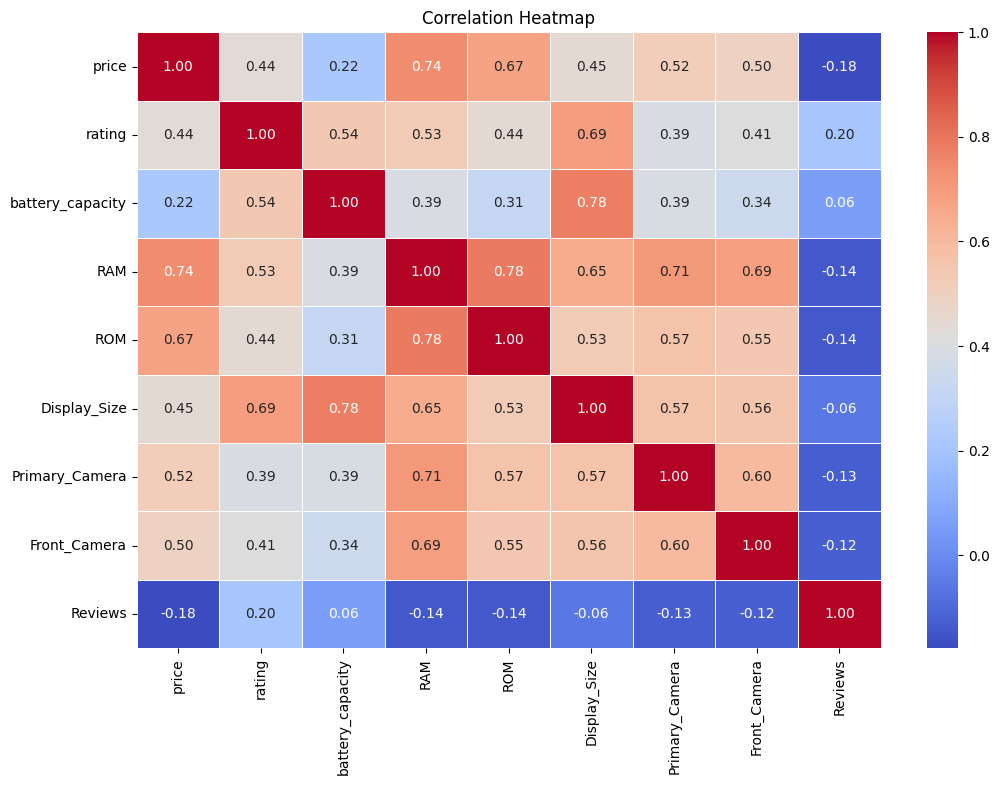

In [198]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')
plt.show()

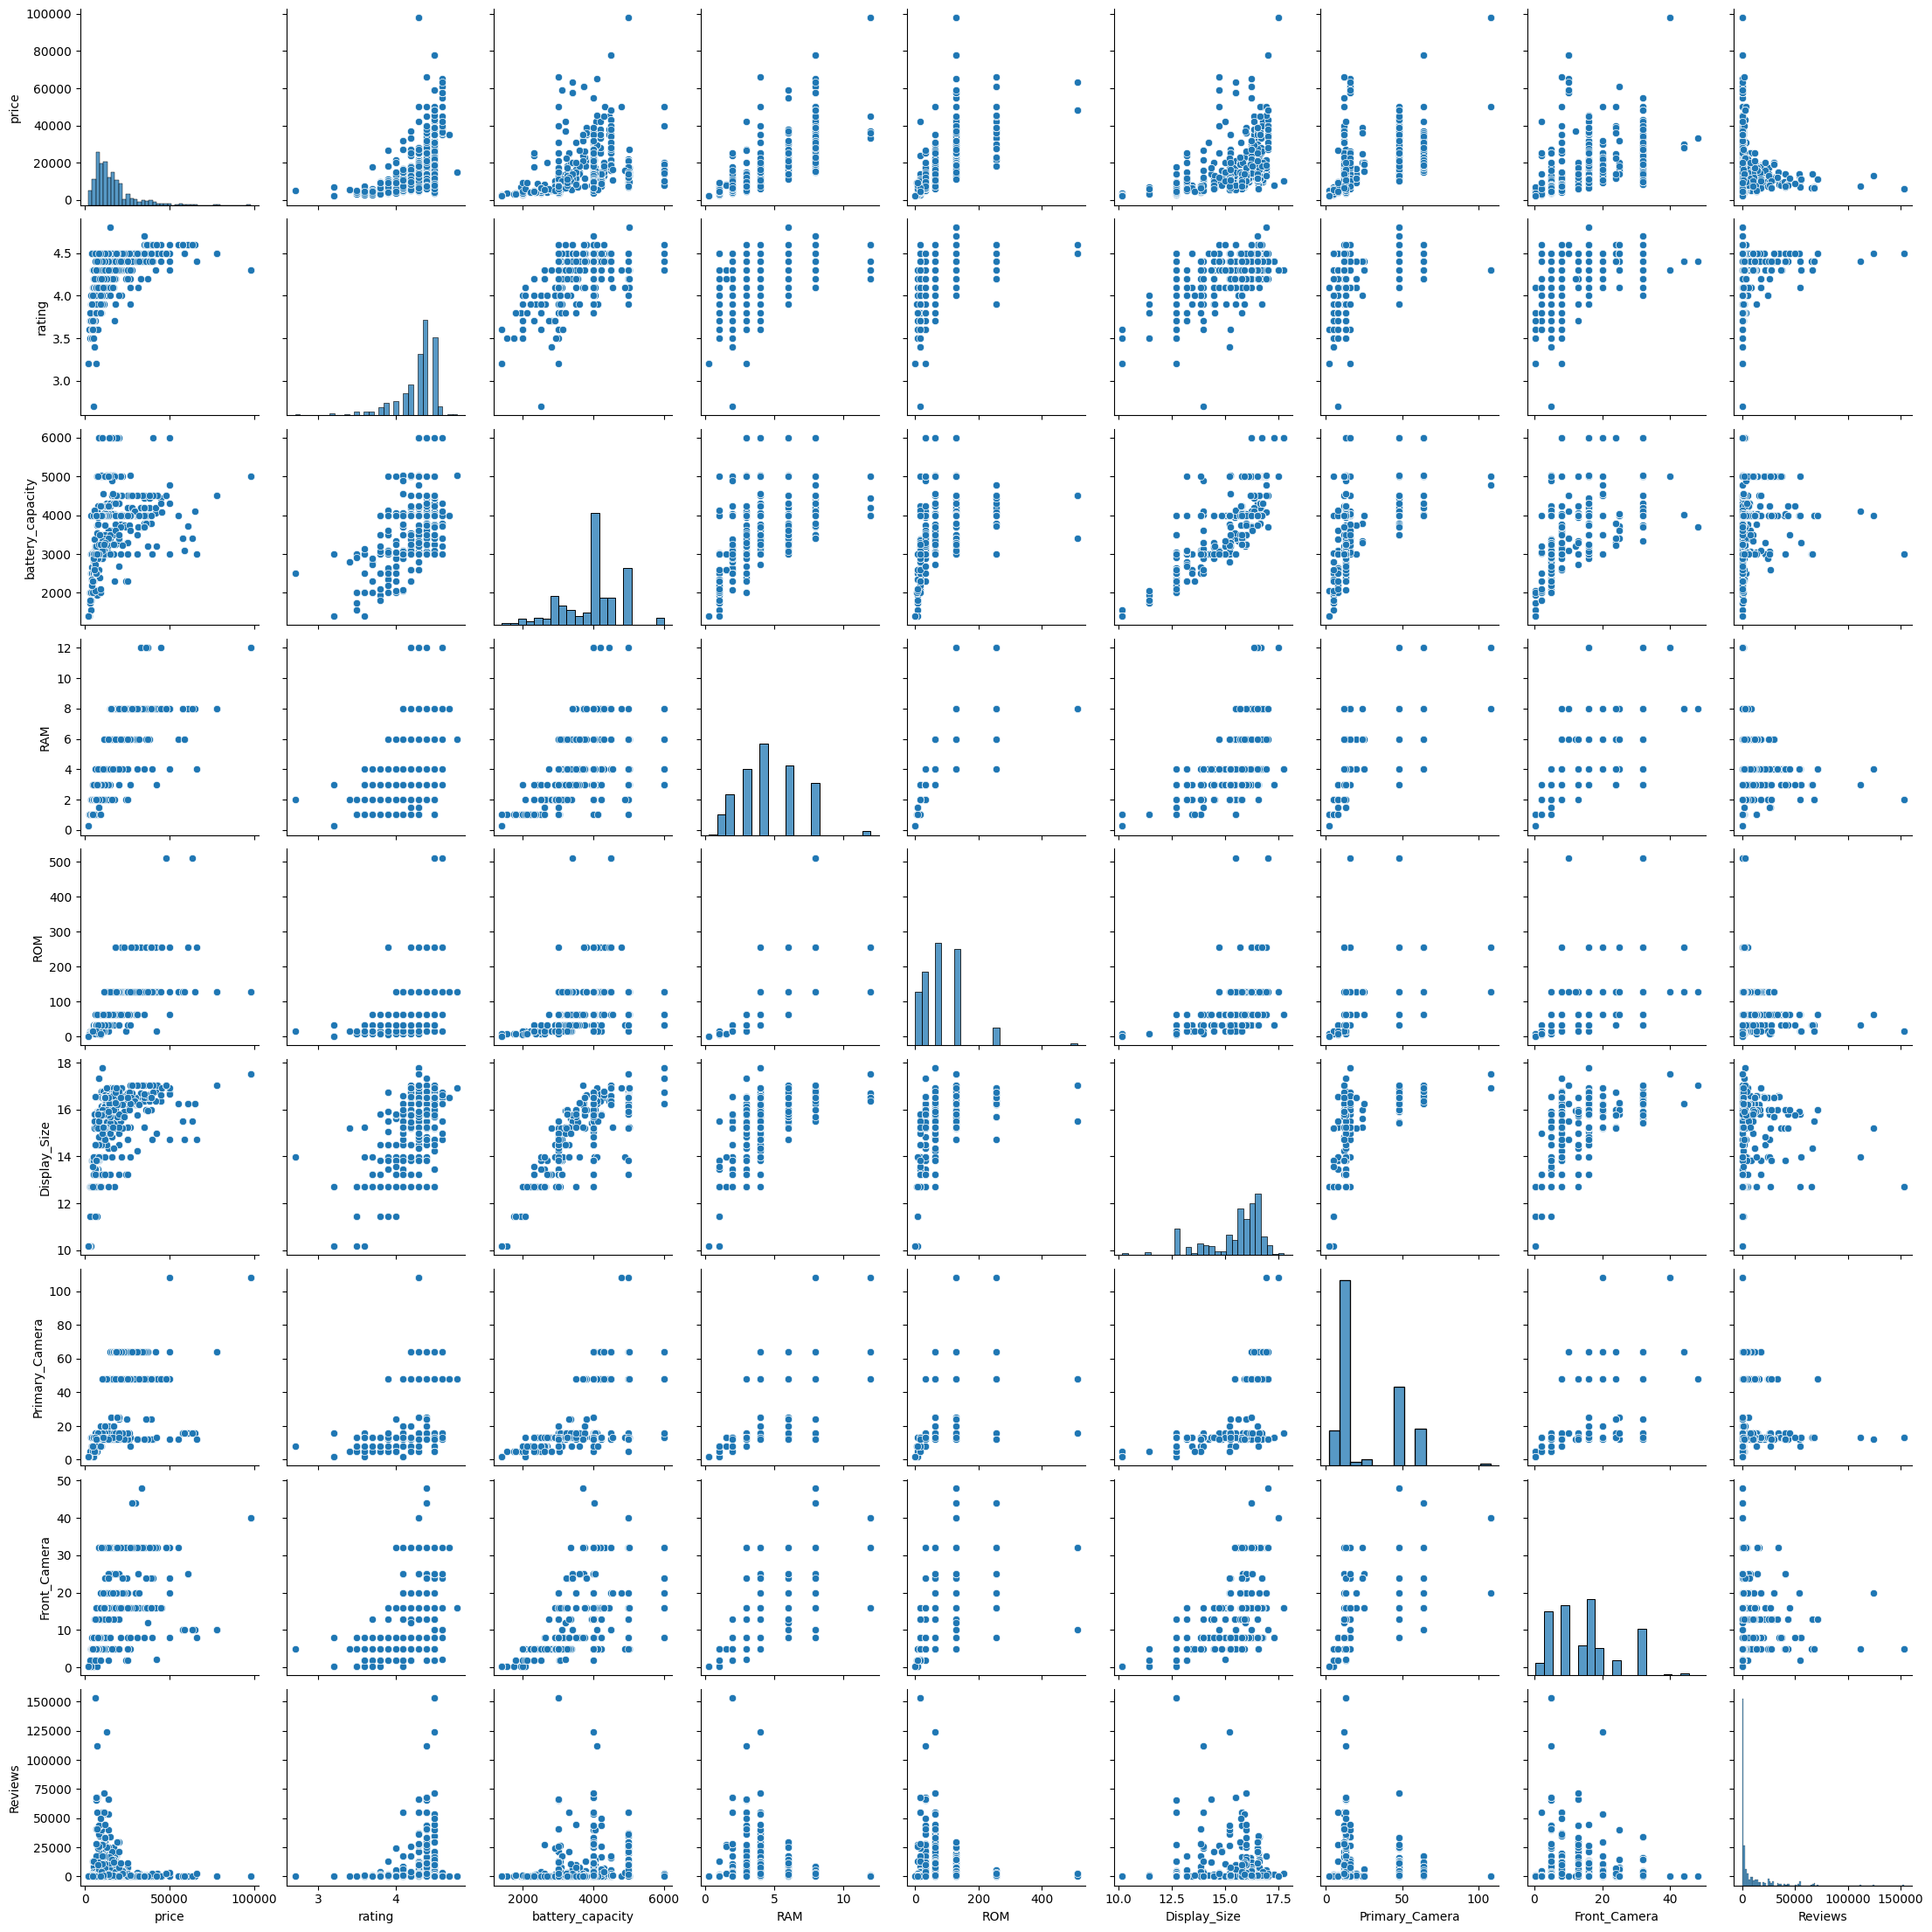

In [199]:
sns.pairplot(df_numeric)
plt.show()

In [200]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df[['processor']])

# Convert the array back to a DataFrame
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['processor']))

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
df_encoded = pd.concat([df['name'], df_numeric, encoded_df], axis=1)

                                 name    price  rating  battery_capacity  RAM  \
0           Redmi 8 (Ruby Red, 64 GB)   9999.0     4.4            5000.0  4.0   
1        Realme 5i (Aqua Blue, 64 GB)  10999.0     4.5            5000.0  4.0   
2       Realme 5i (Aqua Blue, 128 GB)  11999.0     4.5            5000.0  4.0   
3    Realme 5i (Forest Green, 128 GB)  11999.0     4.5            5000.0  4.0   
4     Realme C2 (Diamond Blue, 32 GB)   7499.0     4.4            4000.0  3.0   
..                                ...      ...     ...               ...  ...   
778                               NaN      NaN     NaN               NaN  NaN   
780                               NaN      NaN     NaN               NaN  NaN   
784                               NaN      NaN     NaN               NaN  NaN   
798                               NaN      NaN     NaN               NaN  NaN   
802                               NaN      NaN     NaN               NaN  NaN   

       ROM  Display_Size  P

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [201]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 983
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             809 non-null    int64  
 1   rating            809 non-null    float64
 2   battery_capacity  809 non-null    int64  
 3   RAM               809 non-null    float64
 4   ROM               809 non-null    float64
 5   Display_Size      809 non-null    float64
 6   Primary_Camera    809 non-null    float64
 7   Front_Camera      809 non-null    float64
 8   Reviews           809 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 95.5 KB


In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df_encoded is your DataFrame
# Splitting the data into features and labels
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Dropping categorical features (assuming they are of object dtype or can be inferred from the column names)
# This step assumes categorical columns are of dtype 'object'
X_numerical = X.select_dtypes(exclude=['object'])

# Handling missing values (NaNs) before scaling
# Option 1: Drop rows with NaNs
X_numerical = X_numerical.dropna()
y = y[X_numerical.index]  # Adjust y accordingly

# Option 2: Impute NaNs (replace with mean, median, etc.)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # Choose your imputation strategy
# X_numerical = imputer.fit_transform(X_numerical)

# Standardizing the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting the prices on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Cross-validation to check for the best estimator
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validation R^2 Scores: {cross_val_scores}")
print(f"Average Cross-Validation R^2 Score: {np.mean(cross_val_scores)}")

# Identifying the best features
coefficients = model.coef_
feature_importance = pd.Series(coefficients, index=X_numerical.columns)
sorted_features = feature_importance.abs().sort_values(ascending=False)

print("\nTop 10 Features by Importance:")
print(sorted_features.head(10))

Mean Squared Error (MSE): 2.1215769478222257e+35
R^2 Score: -8.948293288442229e+26
Cross-Validation R^2 Scores: [-1.07260741e+28 -6.99939198e+26 -5.95965409e+27 -7.07689340e+27
 -7.89075951e+27]
Average Cross-Validation R^2 Score: -6.470664057451071e+27

Top 10 Features by Importance:
processor_MT6739 Processor                                        1.417687e+17
processor_0 32-bit Quad Core 1.3GHz Processor                     1.240537e+17
processor_0 0 Quad Core 1.5GHz Processor                          1.184135e+17
processor_MediaTek MT6755 Helio P10 Octa Core 2.0GHz Processor    8.386708e+16
processor_2.0 GHz Helio P22 64-bit Octa Core Processor            8.235957e+16
processor_Qualcomm Snapdragon 730G Processor                      8.085938e+16
processor_Cortex-A53 (MediaTek MT6752 64-bit 4G LTE) Processor    7.265551e+16
processor_Qualcomm Snapdragon 665 Processor                       7.253872e+16
processor_MediaTek Helio G90T Processor                           7.253872e+16
pro